In [2]:
# Import necessary libraries
import pandas as pd

# Load data
data = pd.read_csv('CreditCard.csv')

# Print the shape and description of the data
print(data.shape)
print(data.describe())

# Check for missing values
print(data.isnull().sum())



(1319, 12)
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    

In [3]:
# Identify categorical variables
categorical_vars = ['card', 'owner', 'selfemp']
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Check for any rows/columns to drop or missing values to fill
print(data.isnull().sum())


reports        0
age            0
income         0
share          0
expenditure    0
dependents     0
months         0
majorcards     0
active         0
card_yes       0
owner_yes      0
selfemp_yes    0
dtype: int64


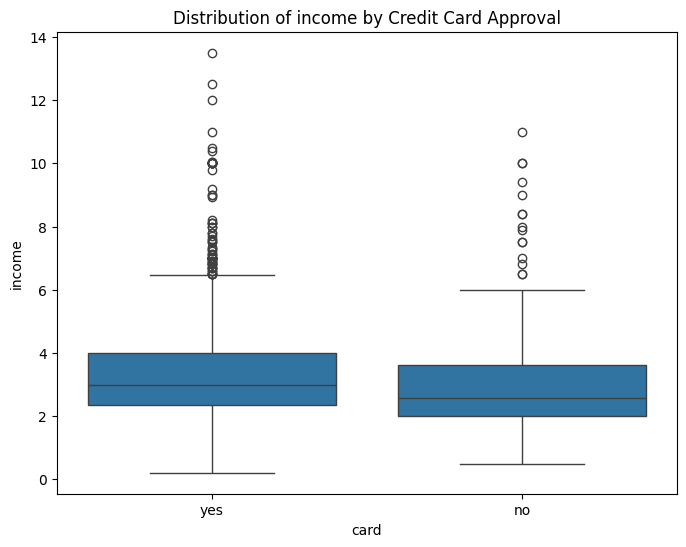

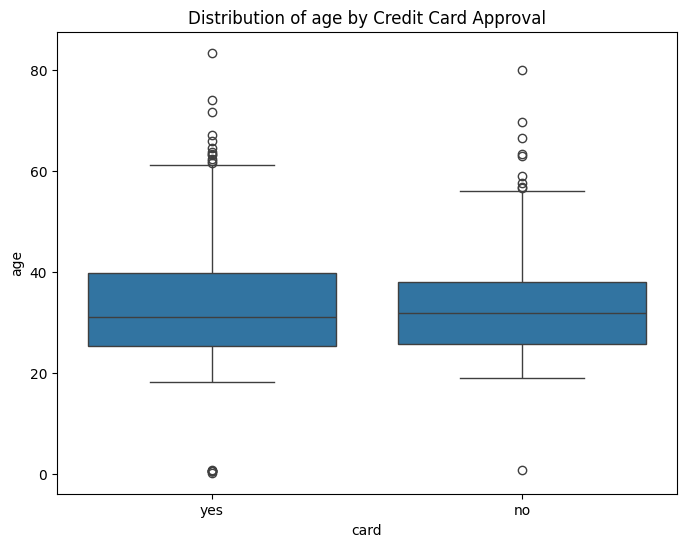

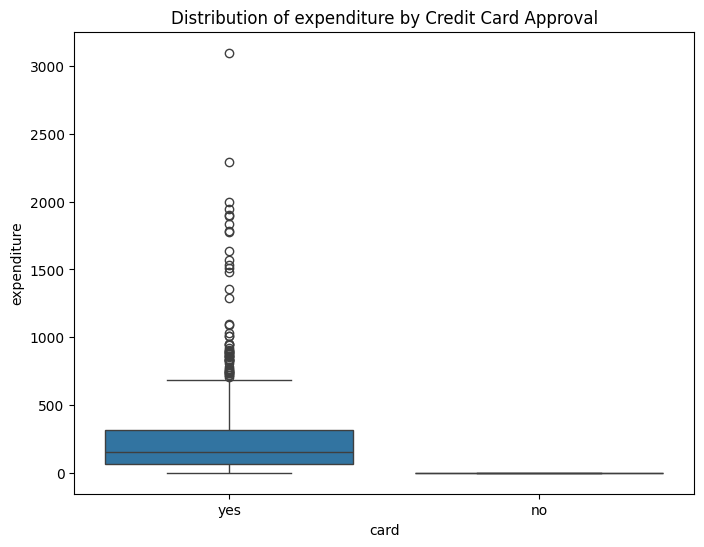

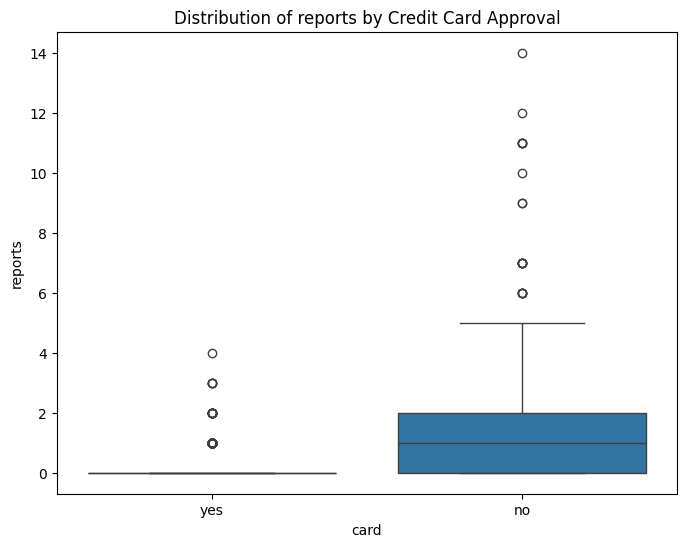

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('CreditCard.csv')

# Sélectionner les variables pour l'exploration
variables_to_explore = ['income', 'age', 'expenditure', 'reports']

# Créer un boxplot pour chaque variable par rapport à la variable cible 'card'
for var in variables_to_explore:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='card', y=var)
    plt.title(f'Distribution of {var} by Credit Card Approval')
    plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Charger les données
data = pd.read_csv('CreditCard.csv')

# Convertir la variable cible en numérique
data['card'] = data['card'].map({'yes': 1, 'no': 0})

# Convertir les variables catégorielles en numériques
data = pd.get_dummies(data, drop_first=True)

# Diviser les données
X = data.drop('card', axis=1)  # Variables indépendantes
y = data['card']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédire les valeurs de test
y_pred = model.predict(X_test)


      Réel  Prédiction
677      1           1
1046     1           1
610      1           1
49       1           1
1284     1           1
...    ...         ...
141      1           1
1169     1           1
613      1           1
543      1           1
139      1           1

[396 rows x 2 columns]


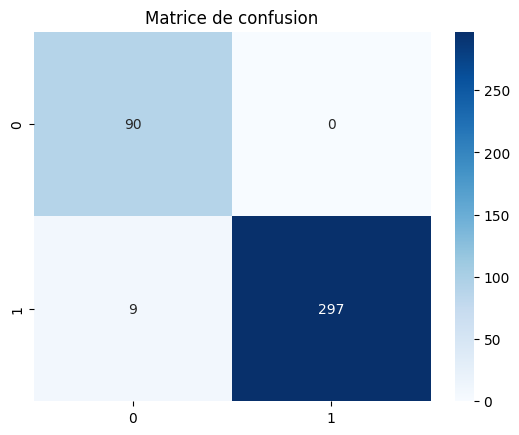

Précision: 0.9772727272727273
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716


In [24]:
# Afficher les prédictions avec les valeurs test et réelles
results = pd.DataFrame({'Réel': y_test, 'Prédiction': y_pred})
print(results)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Précision: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [19]:
import statsmodels.api as sm

# Convertir les variables catégorielles en numériques (si ce n'est pas déjà fait)
data['card'] = data['card'].apply(lambda x: 1 if x == 'yes' else 0)
data['owner'] = data['owner'].apply(lambda x: 1 if x == 'yes' else 0)
data['selfemp'] = data['selfemp'].apply(lambda x: 1 if x == 'yes' else 0)

# Définir les variables indépendantes et la variable cible
X = data[['reports', 'age', 'income', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']]
y = data['card']

# Ajouter une constante à X pour le modèle statsmodels
X_sm = sm.add_constant(X)

# Créer et ajuster le modèle de régression logistique
model_sm = sm.Logit(y, X_sm).fit()
print(model_sm.summary())


         Current function value: 0.042894
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1308
Method:                           MLE   Df Model:                           10
Date:                Thu, 31 Oct 2024   Pseudo R-squ.:                  0.9194
Time:                        00:27:18   Log-Likelihood:                -56.577
converged:                      False   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                2.730e-271
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1349      0.963     -3.257      0.001      -5.022      -1.248
reports        -2.4771      1.022     -2.424      0.015      -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
